In [15]:
import numpy as np
from PIL import Image
from os import path
import matplotlib.pyplot as plt
import random
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [16]:
import pandas as pd
from nltk.corpus import stopwords
import string
df = pd.read_csv('cleandata.csv')
words = df.summary
text = []
for i in str(words).lower().split():
    text.append(i)

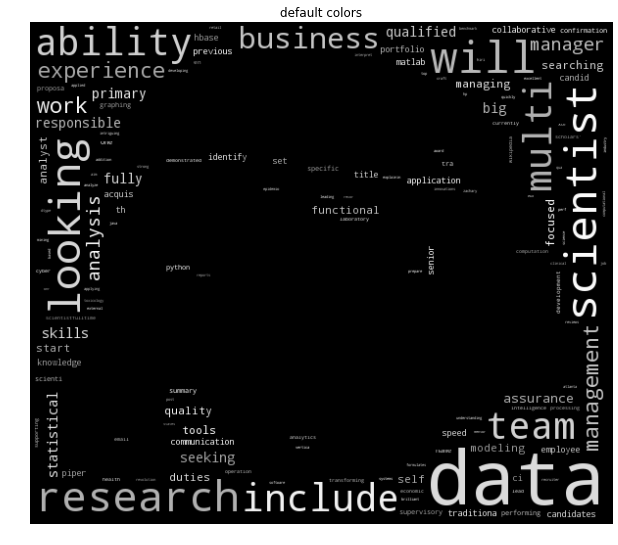

In [36]:
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/star%20wars/storm-trooper.gif
mask = np.array(Image.open('storm-trooper.jpg'))

stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

wc = WordCloud(max_words=1000, margin=10, stopwords=stopwords, mask=mask,
               random_state=1).generate(' '.join(text))
# store default colored image
default_colors = wc.to_array()
plt.figure(figsize=(11,9))
plt.title("default colors")
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3))
wc.to_file("a_new_hope.png")
plt.axis("off")
plt.show()